In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from rdkit import Chem
from rdkit.Chem import Descriptors

In [2]:
# Read the CSV file
df = pd.read_csv('../data/01_raw/plasmodium_falciparum_3d7_assays.csv', low_memory=False) 
print(df.shape)
df

(5235, 28)


,doc_id,assay_id,activity_id,assay_type,assay_confidence_score,assay_bao_format,compound_chembl_id,canonical_smiles,standard_type,standard_value,...,target_tax_id,protein_accession_class,year,pubmed_id,assay_chembl_id,count_activity_rows,doc_id_all,assay_id_all,activity_id_all,assay_description
0,52609,655025,3441477,B,9,BAO_0000357,CHEMBL1241103,NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)CCCCCCCCCCS(=O)...,Inhibition,NaN,...,36329,NaN,2008.0,18246061.0,CHEMBL1244069,1,52609,655025,3441477,Inhibition of Plasmodium falciparum 3D7 PFL229...
1,52609,655025,3441466,B,9,BAO_0000357,CHEMBL1242565,C[C@H](N)C(=O)N[C@H](/C=C/S(=O)(=O)c1ccccc1)CC...,Inhibition,NaN,...,36329,NaN,2008.0,18246061.0,CHEMBL1244069,1,52609,655025,3441466,Inhibition of Plasmodium falciparum 3D7 PFL229...
2,52609,655025,3441467,B,9,BAO_0000357,CHEMBL514348,CCC[C@H](N)C(=O)N[C@H](/C=C/S(=O)(=O)c1ccccc1)...,Inhibition,NaN,...,36329,NaN,2008.0,18246061.0,CHEMBL1244069,1,52609,655025,3441467,Inhibition of Plasmodium falciparum 3D7 PFL229...
3,52609,655032,3441483,B,9,BAO_0000357,CHEMBL1241101,O=C(CCCCCNC(=O)CCCC[C@H]1SC[C@H]2NC(=O)N[C@H]2...,Inhibition,NaN,...,36329,NaN,2008.0,18246061.0,CHEMBL1244076,1,52609,655032,3441483,Inhibition of Plasmodium falciparum 3D7 PFD023...
4,52609,655023,3441462,B,9,BAO_0000357,CHEMBL1242565,C[C@H](N)C(=O)N[C@H](/C=C/S(=O)(=O)c1ccccc1)CC...,Inhibition,NaN,...,36329,NaN,2008.0,18246061.0,CHEMBL1244067,1,52609,655023,3441462,Inhibition of Plasmodium falciparum 3D7 PFD023...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,38637,466721,2143340,B,8,BAO_0000357,CHEMBL405186,Nc1nc(F)nc2c1ncn2[C@@H]1C[C@H](CO)[C@@H](O)[C@...,IC50,1980.0,...,36329,NaN,2008.0,18295495.0,CHEMBL937442,1,38637,466721,2143340,Inhibition of Plasmodium falciparum SAHH
5231,38637,466723,2143349,B,8,BAO_0000357,CHEMBL407219,Nc1nc(F)nc2c1ncn2[C@@H]1C[C@H](CO)[C@H](O)[C@@...,IC50,NaN,...,36329,NaN,2008.0,18295495.0,CHEMBL937444,1,38637,466723,2143349,Inhibition of Plasmodium falciparum SAHH at 50...
5232,38637,466723,2143356,B,8,BAO_0000357,CHEMBL407394,Nc1nc(F)nc2c1ncn2[C@H]1CC[C@@H](CO)C1,IC50,NaN,...,36329,NaN,2008.0,18295495.0,CHEMBL937444,1,38637,466723,2143356,Inhibition of Plasmodium falciparum SAHH at 50...
5233,38637,466723,2143354,B,8,BAO_0000357,CHEMBL411331,Nc1nc(F)nc2c1ncn2[C@@H]1C[C@H](CO)[C@@H]2O[C@@...,IC50,NaN,...,36329,NaN,2008.0,18295495.0,CHEMBL937444,1,38637,466723,2143354,Inhibition of Plasmodium falciparum SAHH at 50...


In [3]:
df.columns

Index(['doc_id', 'assay_id', 'activity_id', 'assay_type',
       'assay_confidence_score', 'assay_bao_format', 'compound_chembl_id',
       'canonical_smiles', 'standard_type', 'standard_value', 'standard_units',
       'standard_relation', 'pchembl_value', 'activity_comment',
       'target_chembl_id', 'target_type', 'target_organism',
       'target_pref_name', 'target_tax_id', 'protein_accession_class', 'year',
       'pubmed_id', 'assay_chembl_id', 'count_activity_rows', 'doc_id_all',
       'assay_id_all', 'activity_id_all', 'assay_description'],
      dtype='object')

In [4]:
df = df[['compound_chembl_id', 'canonical_smiles', 'standard_type', 'standard_value', 'standard_units','pchembl_value']] 
df.shape

(5235, 6)

In [5]:
def summarize(data):  
    imputed_data = data.copy()
    imputed_data['standard_units'].fillna("nan", inplace=True)

    # Group by "standard_type" and "standard_units"
    grouped_data = imputed_data.groupby(['standard_type',"standard_units"]).size().reset_index(name="n_molecules")
    
    grouped_data = grouped_data.groupby("standard_type").apply(
        lambda x: pd.Series({
            "Total_molecules": x["n_molecules"].sum(), # All molecules for each standard type
            "standard_units": x["standard_units"].tolist(), # Available units for the standard type
            "n_molecules_list": x["n_molecules"].tolist() # Molecules for each unit
        })
    ).reset_index()
 
    return grouped_data

summary = summarize(df)
summary

,standard_type,Total_molecules,standard_units,n_molecules_list
0,AC50,895,[nM],[895]
1,AbsAC1000_uM,505,[uM],[505]
2,Activity,137,"[%, U, nM, nan, uM]","[60, 19, 2, 50, 6]"
3,EC50,173,"[nM, nan]","[154, 19]"
4,ED90,6,[mg kg-1],[6]
5,FC,20,[nan],[20]
6,GI,107,[nan],[107]
7,IC50,2775,"[nM, nan, ug.mL-1]","[2589, 48, 138]"
8,IC80,16,"[nan, ng/ml, ug ml-1]","[4, 1, 11]"
9,IC90,2,[ug.mL-1],[2]


In [6]:
#IC50 Assays
ic50 =  df[df["standard_type"].isin(["IC50"])].copy() 
ic50.shape

(2775, 6)

In [7]:
ic50.isna().sum()

compound_chembl_id      0
canonical_smiles        0
standard_type           0
standard_value         48
standard_units         48
pchembl_value         517
dtype: int64

In [8]:
#Drop those without standard values
ic50.dropna(subset=["standard_value", "standard_units"], inplace=True)
#Check the standard units 
ic50.groupby(["standard_units"]).size().reset_index(name="n_molecules")

,standard_units,n_molecules
0,nM,2589
1,ug.mL-1,138


In [9]:
def convert_to_uM(data):
    data = data.copy()
    converted_values = [] 

    for _, row in data.iterrows():
        standard_value = row["standard_value"]
        standard_units = row["standard_units"]
        molecular_weight = row['molecular_weight']
        
        if standard_units == "ug.mL-1":
            converted_value = standard_value / (molecular_weight / 1000)  # Convert from ug/mL to uM 
        elif standard_units == "nM":
            converted_value = standard_value / 1000  # Convert from nM to uM 
        else:  
            converted_value = np.nan 

        converted_values.append(converted_value) 

    data["uM_value"] = converted_values

    # Drop rows where uM_value is nan
    data.dropna(subset=["uM_value"], inplace=True)
    return data

In [10]:
#Examine the distribution of values using plots 
def plot_distribution_and_box(data): 
    # subplots
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Distribution plot
    sns.histplot(data["uM_value"], bins=50, ax=axs[0])
    axs[0].set_xlabel("uM Value")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title("Distribution of uM Values")

    # Box plot
    sns.boxplot(x=data["uM_value"], ax=axs[1])
    axs[1].set_xlabel("uM Value")
    axs[1].set_title("Box Plot of uM Values")

    # Show the plots
    plt.tight_layout()
    plt.show()

In [11]:
# Calculate molecular weights using RDKit's MolWt function
ic50["molecular_weight"] = [Descriptors.MolWt(Chem.MolFromSmiles(smi)) for smi in ic50["canonical_smiles"]]

In [12]:
#convert to uM
ic50_conv = convert_to_uM(ic50) 
ic50_conv[["standard_value", "standard_units", "uM_value", "pchembl_value"]]

,standard_value,standard_units,uM_value,pchembl_value
24,87.00,nM,0.08700,7.06
26,78.00,nM,0.07800,7.11
42,100.00,nM,0.10000,7.00
44,385.08,nM,0.38508,6.41
45,3015.00,nM,3.01500,5.52
...,...,...,...,...
5227,4510.00,nM,4.51000,5.35
5228,2100.00,nM,2.10000,5.68
5229,100.00,nM,0.10000,7.00
5230,1980.00,nM,1.98000,5.70


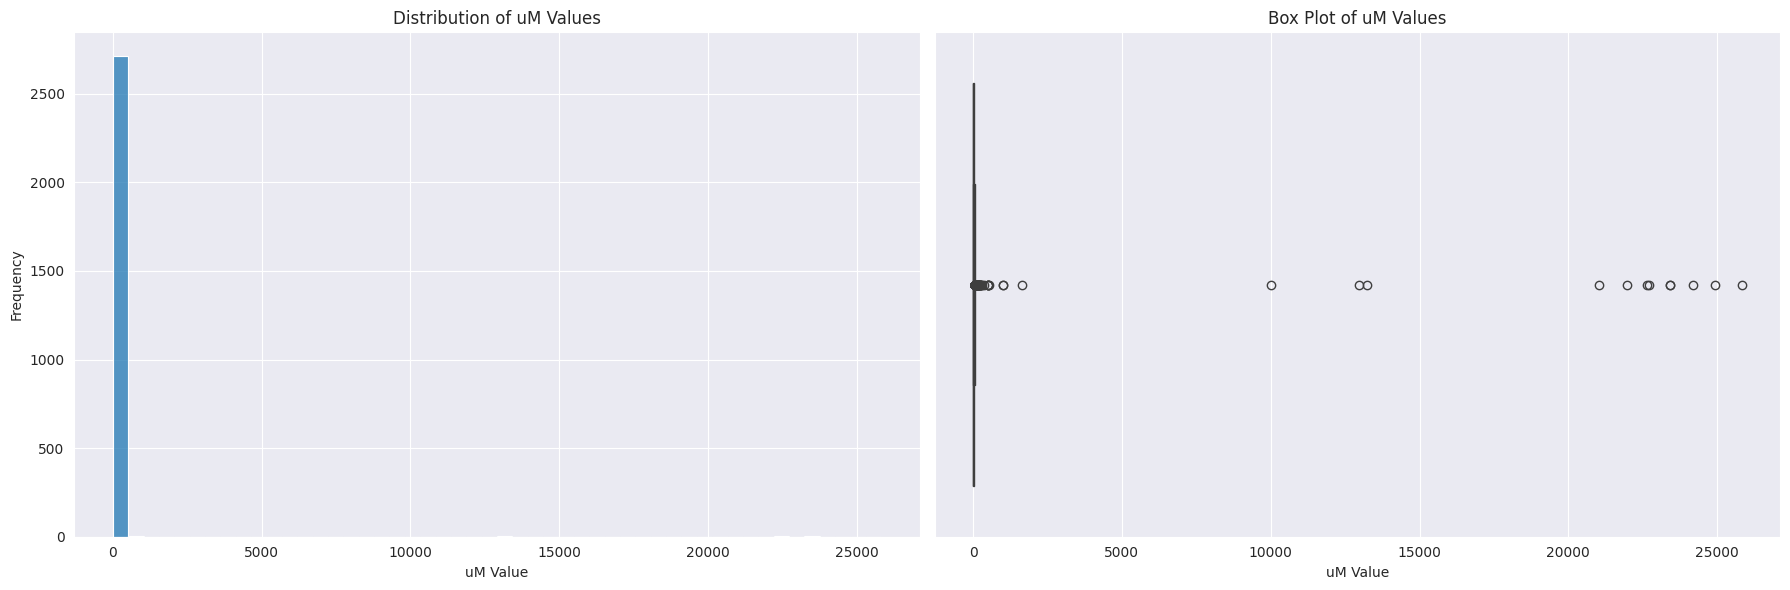

In [13]:
plot_distribution_and_box(ic50_conv)

Keep only those with pchembl value

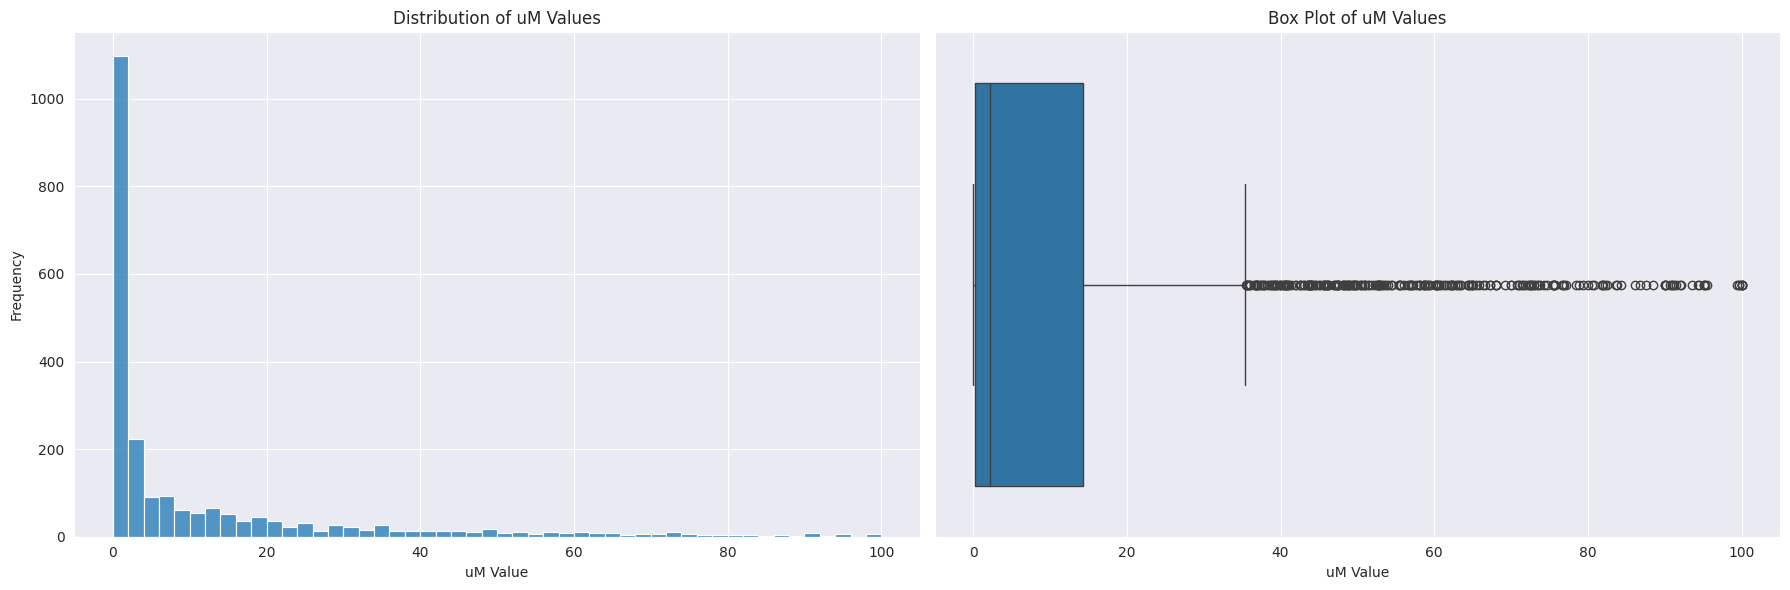

In [14]:
#Drop those without pchembl values 
ic50.dropna(subset=["pchembl_value"], inplace=True)
#convert to uM 
ic50_conv_non_null_pchembl = convert_to_uM(ic50) 

#plot the distribution
plot_distribution_and_box(ic50_conv_non_null_pchembl)

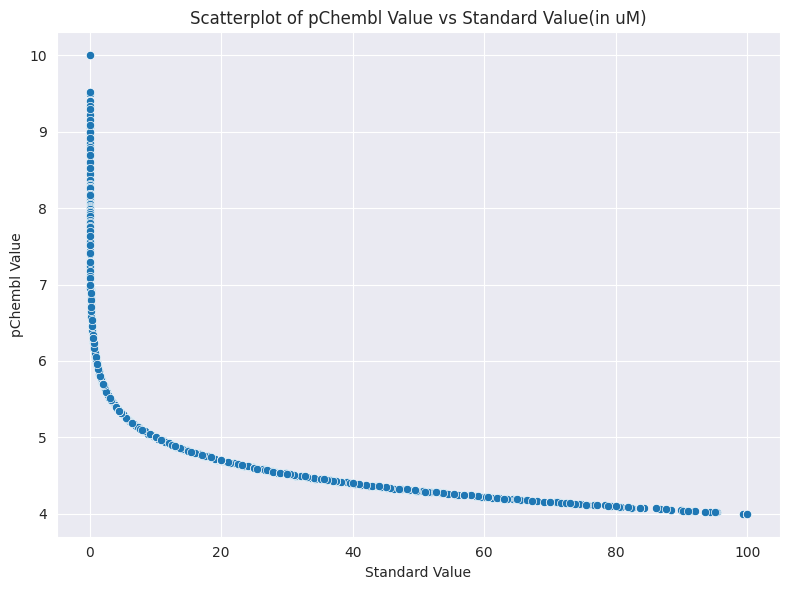

In [15]:
# A scatterplot of pchembl_value against standard_value(in uM)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ic50_conv, x='uM_value', y='pchembl_value')
plt.xlabel('Standard Value')
plt.ylabel('pChembl Value')
plt.title('Scatterplot of pChembl Value vs Standard Value(in uM)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
ic50_final = ic50_conv_non_null_pchembl[["canonical_smiles", "uM_value"]].copy()
ic50_final

,canonical_smiles,uM_value
24,O=C(/C=C/c1ccccc1)N[C@@H](CCCCCC(=O)NO)C(=O)Nc...,0.08700
26,O=C(CCCCC[C@H](NC(=O)c1cc2ccccc2[nH]1)C(=O)Nc1...,0.07800
42,O=C(CCCCCCC(=O)Nc1ccccc1)NO,0.10000
44,O.O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,0.38508
45,CNC[C@H](O)c1ccc(O)c(O)c1.O=C(O)C(O)C(O)C(=O)O,3.01500
...,...,...
5227,Nc1nc(N)c2ncn([C@@H]3C[C@H](CO)[C@@H](O)[C@H]3...,4.51000
5228,C=C1[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@H](O)[C...,2.10000
5229,C[C@@H](O)C1=C[C@@H](n2cnc3c(N)ncnc32)[C@H](O)...,0.10000
5230,Nc1nc(F)nc2c1ncn2[C@@H]1C[C@H](CO)[C@@H](O)[C@...,1.98000


In [17]:
duplicates = ic50_final[ic50_final.duplicated(keep=False)]
print(duplicates)

                                      canonical_smiles  uM_value
744  Cc1ccc(C(=O)Nc2ccc(Oc3ccc(C(=O)O)c(C(=O)O)c3)c...     13.16
745  Cc1ccc(C(=O)Nc2ccc(Oc3ccc(C(=O)O)c(C(=O)O)c3)c...     13.16


In [18]:
ic50_final.drop_duplicates(inplace=True)
ic50_final

,canonical_smiles,uM_value
24,O=C(/C=C/c1ccccc1)N[C@@H](CCCCCC(=O)NO)C(=O)Nc...,0.08700
26,O=C(CCCCC[C@H](NC(=O)c1cc2ccccc2[nH]1)C(=O)Nc1...,0.07800
42,O=C(CCCCCCC(=O)Nc1ccccc1)NO,0.10000
44,O.O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,0.38508
45,CNC[C@H](O)c1ccc(O)c(O)c1.O=C(O)C(O)C(O)C(=O)O,3.01500
...,...,...
5227,Nc1nc(N)c2ncn([C@@H]3C[C@H](CO)[C@@H](O)[C@H]3...,4.51000
5228,C=C1[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@H](O)[C...,2.10000
5229,C[C@@H](O)C1=C[C@@H](n2cnc3c(N)ncnc32)[C@H](O)...,0.10000
5230,Nc1nc(F)nc2c1ncn2[C@@H]1C[C@H](CO)[C@@H](O)[C@...,1.98000


In [19]:
print(ic50_final.shape)
ic50_final.to_csv("../data/01_raw/plasmodium_falciparum_3d7_ic50.csv", index=False)

(2257, 2)
